In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [8]:
df = pd.read_csv('labelled_tweets.csv', 
                    quoting=1,
                    escapechar='\\',
                    index_col='id',
                    dtype={
                        'id': int,
                        'created_at': str,
                        'full_text': str,
                        'score': float
                    })

df['created_at'] = pd.to_datetime(df['created_at'])

In [9]:
print("Total tweets:\n", len(df))
print("Average sentiment:\n", df['score'].mean())

Total tweets:
 12420
Average sentiment:
 -0.008687600694992692


Sentiment Distribution:
 sentiment_bin
Neutral     9591
Negative    1548
Positive    1281
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

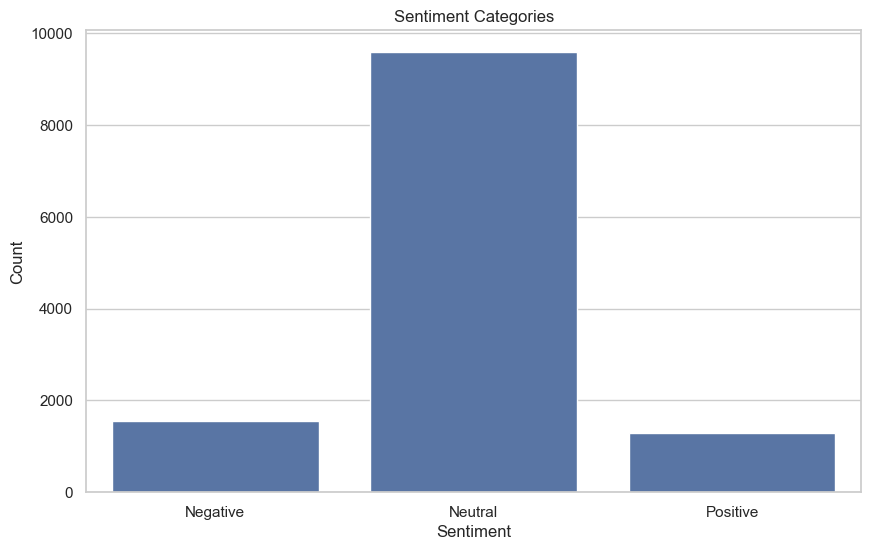

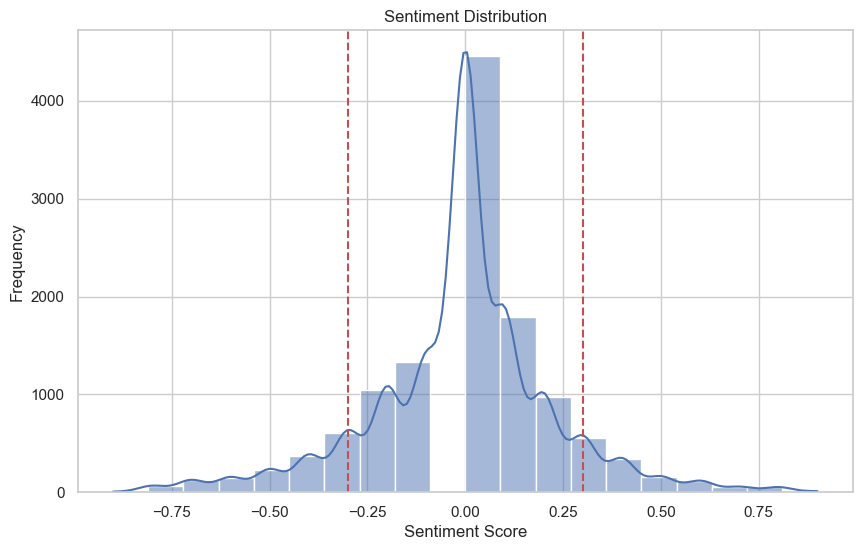

In [10]:
bins = [-1.0, -0.3, 0.3, 1.0]
labels = ["Negative", "Neutral", "Positive"]
df['sentiment_bin'] = pd.cut(df['score'], bins=bins, labels=labels)
sns.set_theme(style="whitegrid")

print("Sentiment Distribution:\n", df['sentiment_bin'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_bin', data=df)
plt.title('Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=20, kde=True)
plt.axvline(x=-0.3, color='r', linestyle='--')
plt.axvline(x=0.3, color='r', linestyle='--')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

Avg sentiment by top 10 tickers:
              mean  count
tickers                 
Unknown -0.001143   2975
SPX     -0.050791   2971
SPY     -0.002004   1048
AAPL     0.007094    733
ES      -0.059032    620
DIS      0.026948    616
JPM     -0.008351    479
AMZN     0.014925    469
spx     -0.106186    388
MSFT     0.011860    371


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'SPX'),
  Text(2, 0, 'SPY'),
  Text(3, 0, 'AAPL'),
  Text(4, 0, 'ES'),
  Text(5, 0, 'DIS'),
  Text(6, 0, 'JPM'),
  Text(7, 0, 'AMZN'),
  Text(8, 0, 'spx'),
  Text(9, 0, 'MSFT')])

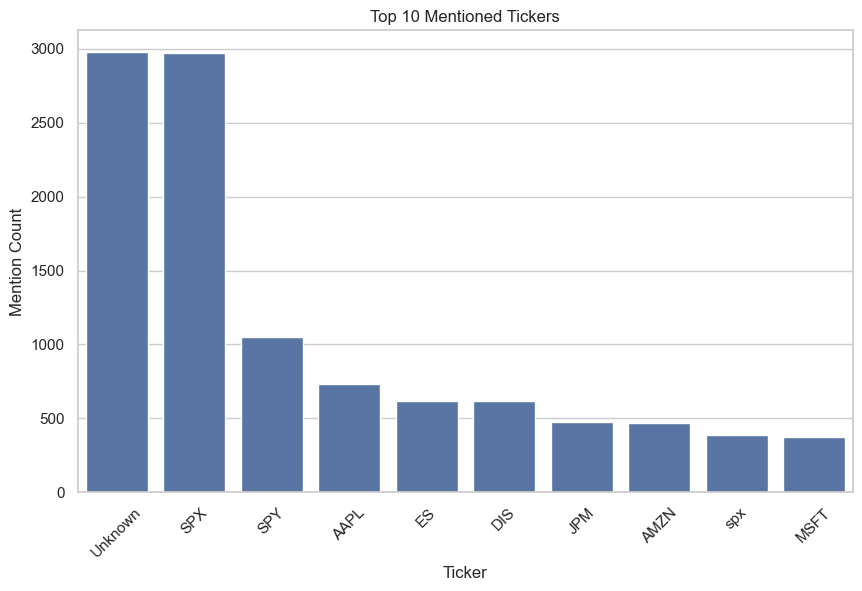

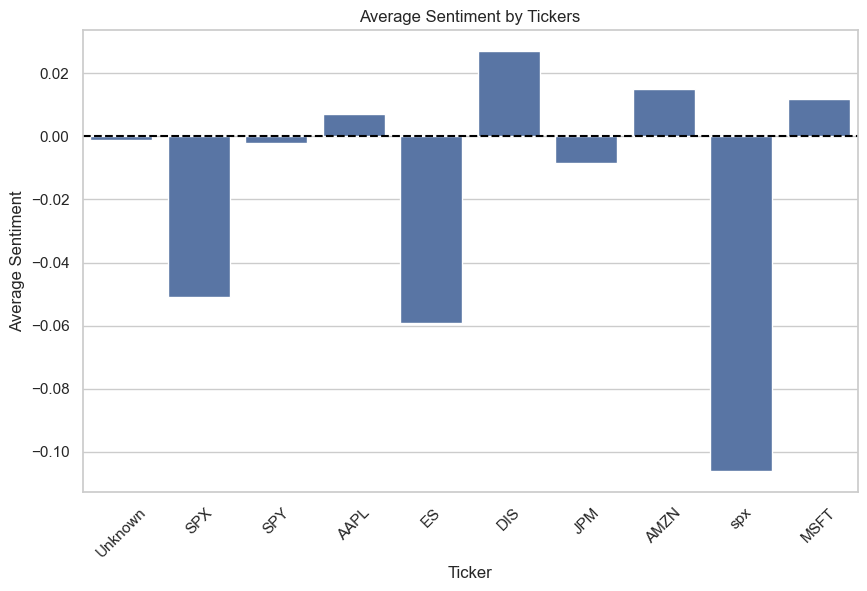

In [ ]:
def get_ticker(text):
    # most tickers start with $
    tickers = re.findall(r'\$([A-Za-z]+)', text)
    return tickers if tickers else ['Unknown']

df['tickers'] = df['full_text'].apply(get_ticker)
df_tickers = df.explode('tickers')

ticker_sentiment = df_tickers.groupby('tickers')['score'].agg(['mean', 'count']).sort_values('count', ascending=False)
print("Avg sentiment by top 10 tickers:\n", ticker_sentiment.head(10))

top_tickers = ticker_sentiment.sort_values('count', ascending=False).head(10)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_tickers.index, y=top_tickers['count'])
plt.title('Top 10 Mentioned Tickers')
plt.xlabel('Ticker')
plt.ylabel('Mention Count')
plt.xticks(rotation=45)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_tickers.index, y=top_tickers['mean'])
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Average Sentiment by Tickers')
plt.xlabel('Ticker')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)

In [ ]:
nltk.data.find('corpora/stopwords')

stop_words = set(stopwords.words('english'))
stop_words.update({'rt', 'https', 'co', 'amp'})
def filter_words(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return filtered_tokens

df['words'] = df['full_text'].apply(filter_words)
all_words = [word for words_list in df['words'] for word in words_list]
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)
print("Most common words:\n", most_common_words)


Most common words:
 [('stocks', 4327), ('spx', 3573), ('spy', 1345), ('trading', 1150), ('market', 1129), ('aapl', 928), ('...', 879), ('stock', 873), ('today', 861), ('dis', 722), ('stockmarket', 688), ('es_f', 686), ('fed', 626), ('amzn', 615), ('buy', 611), ('investing', 607), ('week', 553), ('sp500', 530), ('jpm', 529), ('day', 520)]
